In [1]:
# load the libraries
library(OpenStreetMap)
library(ggplot2)

# Extreme points of the European Union
# https://en.wikipedia.org/wiki/Extreme_points_of_the_European_Union
LAT1 =  71.133889 ; LAT2 = 36.004167
LON1 = -9.499011 ; LON2 = 31.583333

cities <- read.csv("data//cities.csv")
cities

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for me

city      latitude longitude
1 Berlin    52.52437 13.410530
2 Paris     48.85661  2.352222
3 Stockholm 59.32944 18.068611
4 Rome      41.88333 12.500000

In [2]:
map <- openmap(c(LAT2,LON1), c(LAT1,LON2),
               zoom = NULL,
               type = "osm",
               mergeTiles = TRUE)
# takes a while
print("done loading map")

[1] "done loading map"


In [ ]:
# plot latlon
autoplot( OpenStreetMap::openproj( map ) ) +
  geom_point( data = cities, aes( x = longitude, y = latitude, size = 5 ) ) +
  geom_text( data = cities, aes( x = longitude + .001, y = latitude, label = city ), hjust = -0.5 ) +
  theme( legend.position = "none" )

In [5]:
# plot mercator
cities2 <- as.data.frame( 
  OpenStreetMap::projectMercator( lat = cities$latitude, 
                                  long = cities$longitude ) 
  )
cities2 <- cbind( cities, cities2)
cities2
#autoplot( map ) +
#  geom_point( data = cities2, aes( x = x, y = y, size = 5 ) ) +
#  geom_text( data = cities2, aes( x = x, y = y, label = city ), hjust = 100 ) +
#  theme( legend.position = "none" )

city      latitude longitude x         y      
1 Berlin    52.52437 13.410530 1492853.4 6895499
2 Paris     48.85661  2.352222  261848.2 6250567
3 Stockholm 59.32944 18.068611 2011388.6 8251936
4 Rome      41.88333 12.500000 1391493.6 5143519

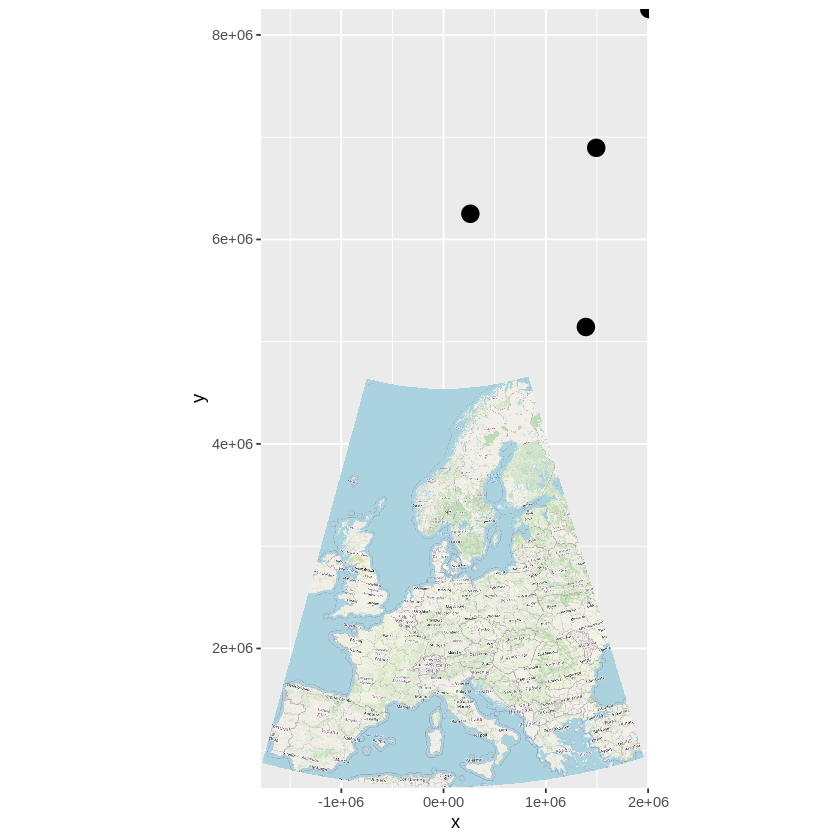

In [6]:
# project albers
#cities3 <- as.data.frame( 
#    OpenStreetMap::openproj(x = cities$longitude, y = cities$latitude, projection = "+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs")  
#)
#cities3 <- cbind(cities, cities3)
#cities3

# reproject map
map.albers <- openproj(map, projection = "+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs")


In [44]:
library(sp)
library (rgdal)
crs <- "+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs"

#SpatialPoints(cbind(lon=cities$logitude, lat=cities$latitude))

#pts.euref <- SpatialPoints(cbind(lon = sample (300000:500000, 100),lat = sample (6800000:7000000,100)))
#proj4string(pts.euref) <- CRS(crs)
#print(pts.euref)

#proj4string(cities) <- CRS(esri)

#pts.wgs84<- spTransform(cities, CRS())
cities <- read.csv("data//cities.csv")
cities

city      latitude longitude
1 Berlin    52.52437 13.410530
2 Paris     48.85661  2.352222
3 Stockholm 59.32944 18.068611
4 Rome      41.88333 12.500000

In [45]:
coordinates(cities) <- c("longitude", "latitude")
proj4string(cities) <- CRS(crs)
cities.albers <- spTransform(cities, CRS(crs))
print(cities.albers)
crs

           coordinates      city
1 (13.41053, 52.52437)    Berlin
2 (2.352222, 48.85661)     Paris
3 (18.06861, 59.32944) Stockholm
4     (12.5, 41.88333)      Rome


[1] "+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0 +ellps=intl +units=m +no_defs"

longitude latitude
1 13.410530 52.52437
2  2.352222 48.85661
3 18.068611 59.32944
4 12.500000 41.88333

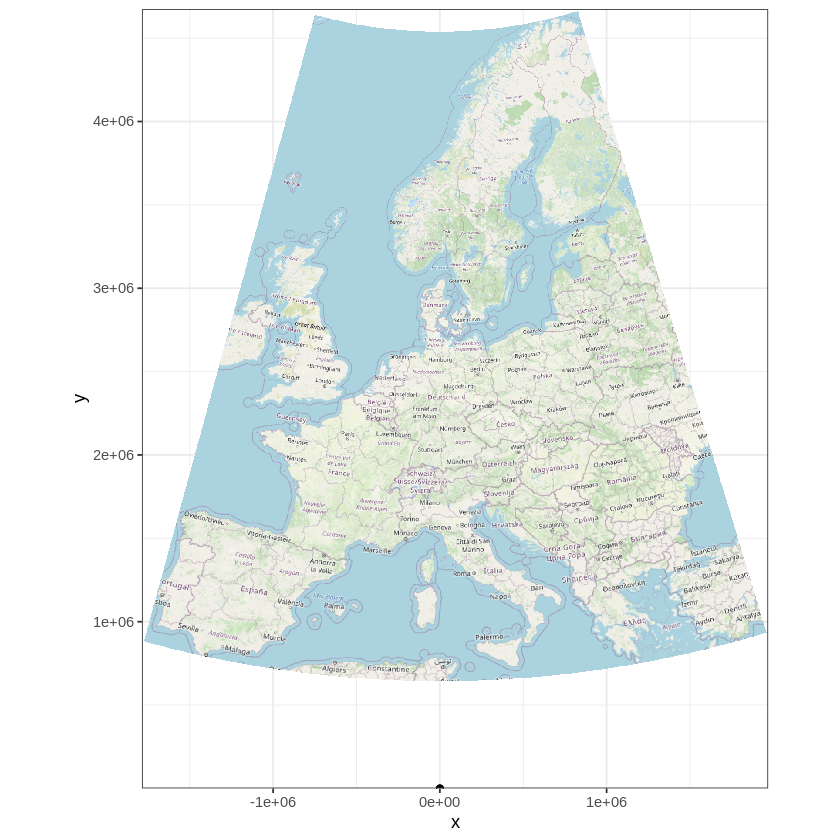

In [38]:
#autoplot( map.albers ) +
#  geom_point( data = cities.albers, aes( x = x, y = y, size = 5 ) ) +
#  geom_text( data = cities2, aes( x = x, y = y, label = city ), hjust = 100 ) +
#  theme( legend.position = "none" )

data.frame(cities.albers@coords)
autoplot(map.albers) + 
    geom_point(data = data.frame(cities.albers@coords), aes(x = longitude, y = latitude)) + 
    theme_bw()

In [46]:
data(state)
states <- data.frame(state.x77, state.center)
states <- states[states$x > -121,]
coordinates(states) <- c("x", "y")
proj4string(states) <- CRS("+proj=longlat +ellps=clrk66")
summary(states)

Object of class SpatialPointsDataFrame
Coordinates:
        min      max
x -120.0680 -68.9801
y   27.8744  47.4231
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=clrk66]
Number of points: 48
Data attributes:
   Population        Income       Illiteracy       Life.Exp    
 Min.   :  376   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1188   1st Qu.:3964   1st Qu.:0.600   1st Qu.:70.13  
 Median : 2980   Median :4488   Median :0.900   Median :70.67  
 Mean   : 4398   Mean   :4386   Mean   :1.148   Mean   :70.85  
 3rd Qu.: 5064   3rd Qu.:4768   3rd Qu.:1.450   3rd Qu.:71.88  
 Max.   :21198   Max.   :5348   Max.   :2.800   Max.   :72.96  
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   : 11.00   Min.   :  1049  
 1st Qu.: 4.275   1st Qu.:47.70   1st Qu.: 68.75   1st Qu.: 38762  
 Median : 6.850   Median :53.05   Median :114.50   Median : 54277  
 Mean   : 7.321   Mean   :52.64   Mean   :105.65   Mean   : 61

In [47]:
state.ll83 <- spTransform(states, CRS("+proj=longlat +ellps=GRS80"))
summary(state.ll83)

Object of class SpatialPointsDataFrame
Coordinates:
        min      max
x -120.0680 -68.9801
y   27.8744  47.4231
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=GRS80]
Number of points: 48
Data attributes:
   Population        Income       Illiteracy       Life.Exp    
 Min.   :  376   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1188   1st Qu.:3964   1st Qu.:0.600   1st Qu.:70.13  
 Median : 2980   Median :4488   Median :0.900   Median :70.67  
 Mean   : 4398   Mean   :4386   Mean   :1.148   Mean   :70.85  
 3rd Qu.: 5064   3rd Qu.:4768   3rd Qu.:1.450   3rd Qu.:71.88  
 Max.   :21198   Max.   :5348   Max.   :2.800   Max.   :72.96  
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   : 11.00   Min.   :  1049  
 1st Qu.: 4.275   1st Qu.:47.70   1st Qu.: 68.75   1st Qu.: 38762  
 Median : 6.850   Median :53.05   Median :114.50   Median : 54277  
 Mean   : 7.321   Mean   :52.64   Mean   :105.65   Mean   : 617

In [48]:
state.merc <- spTransform(states, CRS=CRS("+proj=merc +ellps=GRS80"))
summary(state.merc)

Object of class SpatialPointsDataFrame
Coordinates:
        min      max
x -13365909 -7678830
y   3213175  5979931
Is projected: TRUE 
proj4string : [+proj=merc +ellps=GRS80]
Number of points: 48
Data attributes:
   Population        Income       Illiteracy       Life.Exp    
 Min.   :  376   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1188   1st Qu.:3964   1st Qu.:0.600   1st Qu.:70.13  
 Median : 2980   Median :4488   Median :0.900   Median :70.67  
 Mean   : 4398   Mean   :4386   Mean   :1.148   Mean   :70.85  
 3rd Qu.: 5064   3rd Qu.:4768   3rd Qu.:1.450   3rd Qu.:71.88  
 Max.   :21198   Max.   :5348   Max.   :2.800   Max.   :72.96  
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   : 11.00   Min.   :  1049  
 1st Qu.: 4.275   1st Qu.:47.70   1st Qu.: 68.75   1st Qu.: 38762  
 Median : 6.850   Median :53.05   Median :114.50   Median : 54277  
 Mean   : 7.321   Mean   :52.64   Mean   :105.65   Mean   : 61749  

In [49]:
state.albers <- spTransform(states, CRS=CRS(crs))
summary(state.albers)

Object of class SpatialPointsDataFrame
Coordinates:
       min      max
x -7226118 -5004472
y  4649393  8722882
Is projected: TRUE 
proj4string :
[+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0
+ellps=intl +units=m +no_defs]
Number of points: 48
Data attributes:
   Population        Income       Illiteracy       Life.Exp    
 Min.   :  376   Min.   :3098   Min.   :0.500   Min.   :67.96  
 1st Qu.: 1188   1st Qu.:3964   1st Qu.:0.600   1st Qu.:70.13  
 Median : 2980   Median :4488   Median :0.900   Median :70.67  
 Mean   : 4398   Mean   :4386   Mean   :1.148   Mean   :70.85  
 3rd Qu.: 5064   3rd Qu.:4768   3rd Qu.:1.450   3rd Qu.:71.88  
 Max.   :21198   Max.   :5348   Max.   :2.800   Max.   :72.96  
     Murder          HS.Grad          Frost             Area       
 Min.   : 1.400   Min.   :37.80   Min.   : 11.00   Min.   :  1049  
 1st Qu.: 4.275   1st Qu.:47.70   1st Qu.: 68.75   1st Qu.: 38762  
 Median : 6.850   Median :53.05   Median :114.50   Median : 54277  


In [52]:
cities <- read.csv("data//cities.csv")
coordinates(cities) <- c("longitude", "latitude")
proj4string(cities) <- CRS("+proj=longlat +ellps=clrk66")
summary(cities)

Object of class SpatialPointsDataFrame
Coordinates:
                min      max
longitude  2.352222 18.06861
latitude  41.883333 59.32944
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=clrk66]
Number of points: 4
Data attributes:
        city  
 Berlin   :1  
 Paris    :1  
 Rome     :1  
 Stockholm:1  

In [53]:
cities.albers <- spTransform(cities, CRS=CRS(crs))
summary(cities.albers)

Object of class SpatialPointsDataFrame
Coordinates:
                min       max
longitude -554224.1  454813.7
latitude  1293815.4 3274209.9
Is projected: TRUE 
proj4string :
[+proj=aea +lat_1=43 +lat_2=62 +lat_0=30 +lon_0=10 +x_0=0 +y_0=0
+ellps=intl +units=m +no_defs]
Number of points: 4
Data attributes:
        city  
 Berlin   :1  
 Paris    :1  
 Rome     :1  
 Stockholm:1  

longitude latitude
1  228279.3 2487464 
2 -554224.1 2097975 
3  454813.7 3274210 
4  208051.1 1293815

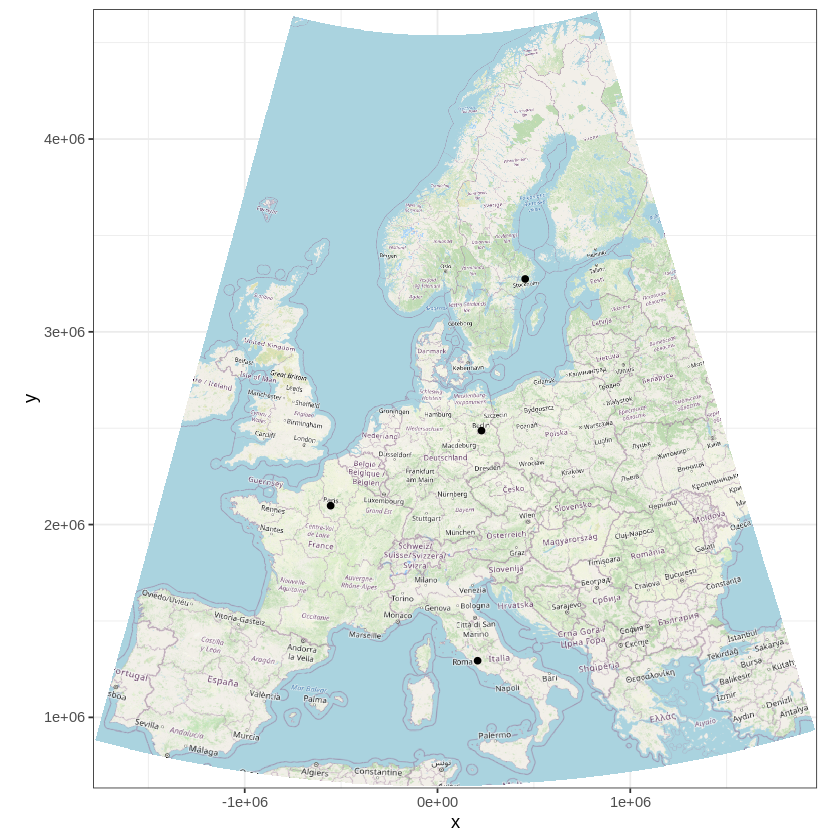

In [54]:
data.frame(cities.albers@coords)
autoplot(map.albers) + 
    geom_point(data = data.frame(cities.albers@coords), aes(x = longitude, y = latitude)) + 
    theme_bw()